# ICS 434: DATA SCIENCE FUNDAMENTALS

## Normal (or Gaussian) Distribution
---

## Announcements

* Weekly engagement #4
  * Complete the assignment for __Week 6__ under "Weekly Engagement" in Laulima
  * Submit the Jupyter notebook file (.ipynb) with your answers and outputs
  * Due on Sunday, __February 19, 11:55 PM__

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy

### The Normal Distribution


* The `normal` or `Gaussian` distribution is a continuous probability distribution
  
* Numerous real-world phenomena can be modeled, or approximated using normal distributions

* Some examples:
  * The heights of males in a population
  * Errors in an instrument
  * Duration of cab rides
    
* Many statistical tests assume that your data is distributed according to a normal distribution
  * More on this later

### The Normal Distribution


* The `normal` or `Gaussian` distribution is a continuous probability distribution
  
* Numerous real-world phenomena can be modeled, or approximated using normal distributions

* Some examples:
  * The heights of males/females in a population
  * Duration of cab rides
    
* Many statistical tests assume that your data is distributed according to a normal distribution
  * More on this later

### Properties of the Normal Distribution

* The normal distribution is a continuous distribution
  * Typically graphically represented as a continuous curve
    * As opposed to the discrete distribution, the continuous can usually take any values either in a closed or open range
  * The probability space is uncountably infinite

* The Gaussian is bell-shaped
  * Symmetric with a mode in middle
  
    <img src="images/gaussian.png" width="400">


### Properties of the Normal Distribution -- Cont'd

- The `parameters` for a normal distribution are the location of its center (mean) and spread (standard deviation)
  - $\mu$ is the mean; it governs where the middle of the distribution lies on the $x$-axis
  - $\sigma$ is the standard deviation; determines how wide the bell is and can also be referred to as the scale

- To describe that a random variable is distributed according to a normal distribution with parameters $\mu$ and $\sigma$, we write:

$$
X \sim \mathcal{N} (\mu,\sigma)
$$

* As with the binomial, two Gaussian distributions with different parameters tell different stories:

$$
X \sim (\mu = 0, \sigma = 1) \ne Y \sim (\mu = 1, \sigma = 1) \ne Z \sim (\mu = 2, \sigma = 2)
$$



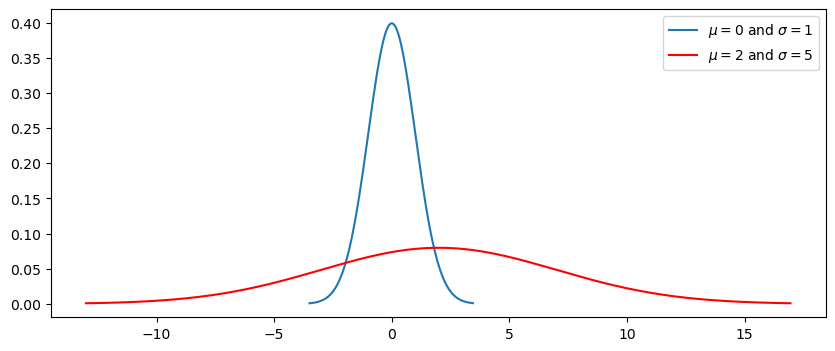

In [2]:
from scipy.stats import norm

plt.figure(figsize=(10, 4))

x = np.arange(-3.5, 3.5, 0.05)
p_x = [norm.pdf(val, 0, 1) for val in x]
plt.plot(x, p_x, label="$\mu = 0$ and $\sigma = 1$")

x = np.arange(-13, 17, 0.05)
p_x = [norm.pdf(val, 2, 5) for val in x]
plt.plot(x, p_x, label="$\mu = 2$ and $\sigma = 5$", color='r')

plt.legend();

<img src="images/mean_var_diffs.png?dl=1" width="700">


### The Spread and Density

<center><img src="images/two-norm-dist.png" width="600"></center>
    
- For the blue curve ($\mu = 0$ and $ \sigma = 1$), the range of values with high densities is small
  
- For the red curve ($\mu = 2$ and $\sigma = 5$), the range of values with low densities is larger than that of the blue curve
  
- Think of this in terms of the probability distribution of the biased die from the binomial example
  - If you were to draw a random value - just like when we were sampling from the die - what do you think the values obtained from the red distribution would look like?


### Properties of the Normal Distribution -- Cont'd

- The probability density function for a random variable $X \sim \mathcal{N} (\mu,\sigma)$ is:


$$ 
    p(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{\frac{(x-\mu)^2}{2\sigma^2}}
$$


- Since the sample space is uncountably infinite, the probability of a single outcom is 0
- Therefore, instead of computing the `pmf`, continuous random variables compute the `pdf`


In [3]:
# We can manually implement the CDF

def computePDF_normal (x, mu, sigma):
    return 1.0/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2.0 / (2 * sigma**2))


### `pdf` versus `pmf`

- A `pdf` is conceptually similar to a `pmf`, but instead of giving you a probability, it tells you the density around a particular point
  - You can think of it as mass (as in `pmf`) normalized by a small area  
    - Ex. in the  $x \sim \mathcal{N}(0, 1)$ probability density around $0$ is much higher than the density around $-2.5$
- Since $X$ is continuous, the `pdf` is also continuous
- The total area under the `pdf` curve sums to 1


### Data in the Distribution -- 1$\sigma$

- In the normal distribution, the area with the highest density lies close to the mean
  - Thus, when we sample from a normal distribution, the bulk of the observations generated lie near the mean
  
  <img src="images/dist_1_std.png?dl=1" width="700px">

### Data in the Distribution -- 2$\sigma$

<img src="images/dist_2_std.png" width="700">


### Data in the Distribution -- 3$\sigma$

<img src="images/dist_3_std.png" width="700">


In [3]:
# We can manually implement the CDF

def computePDF_normal (x, mu, sigma):
    return 1.0/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2.0 / (2 * sigma**2))


Text(0.5, 1.0, '$\\mu=0$ and $\\sigma=2$')

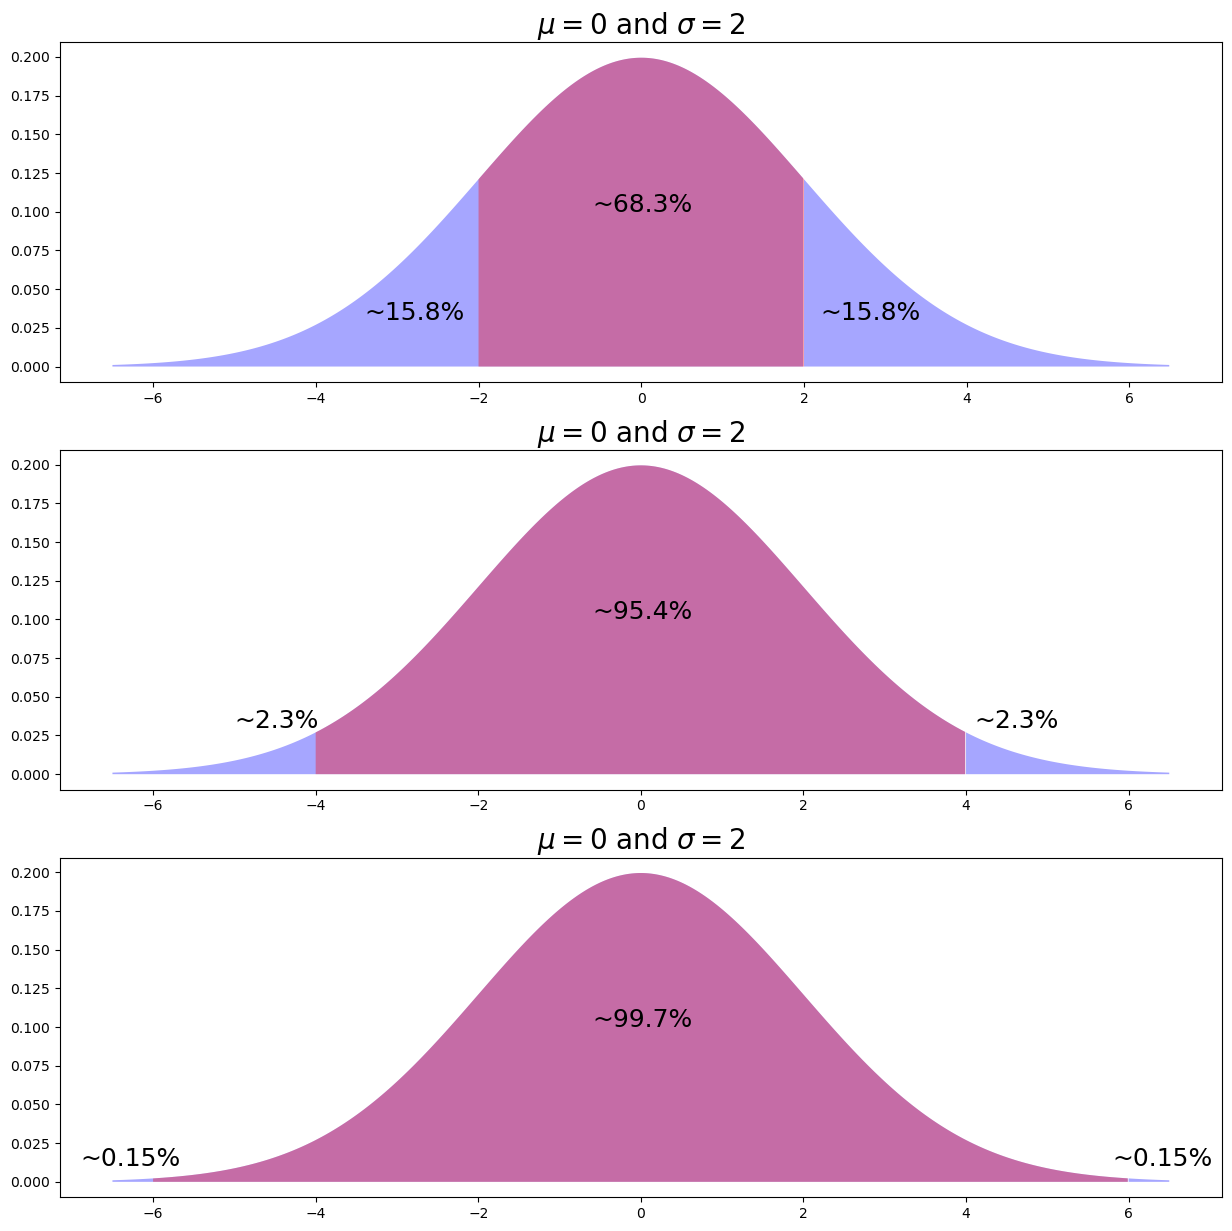

In [4]:
# We manually implement the CDF
def computePDF_normal (x, mu, sigma):
    return 1.0/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2.0 / (2 * sigma**2))
    

f, (ax1, ax2, ax3) = plt.subplots(3)
f.set_figheight(15)
f.set_figwidth(15)

title = "$\mu=0$ " + "and " + "$\sigma=2$"
x_values = np.array(np.arange(-6.5, 2, 0.01))
ax1.fill_between(x=x_values, 
                 y1=computePDF_normal(x_values, 0, 2),
                 facecolor="blue",
                 alpha=0.35)

x_values = np.arange(2, 6.5, 0.01)
ax1.fill_between(x=x_values, 
                 y1= computePDF_normal(x_values, 0, 2),
                 facecolor="blue",
                 alpha=0.35)

x_values = np.arange(-2, 2.01, 0.01)
ax1.fill_between(x=x_values, 
                 y1= computePDF_normal(x_values, 0, 2),
                 facecolor='red',
                 alpha=0.35)
ax1.text(x=-3.4, y=0.03, s="~15.8%", fontsize=18)
ax1.text(x=-0.6, y=0.1, s="~68.3%", fontsize=18)
ax1.text(x=2.2, y=0.03, s="~15.8%", fontsize=18)
ax1.set_title(title, fontsize=20)


x_values = np.array(np.arange(-6.5, 4, 0.01))
#print computePDF(x_values, 0, 0.1)
ax2.fill_between(x=x_values, 
                 y1=computePDF_normal(x_values, 0, 2),
                 facecolor="blue",
                 alpha=0.35)

x_values = np.arange(4, 6.51, 0.01)
ax2.fill_between(x=x_values, 
                 y1= computePDF_normal(x_values, 0, 2),
                 facecolor="blue",
                 alpha=0.35)
x_values = np.arange(-4, 4, 0.01)
ax2.fill_between(x=x_values, 
                 y1= computePDF_normal(x_values, 0, 2),
                 facecolor='red',
                 alpha=0.35)
ax2.text(x=-5, y=0.03, s="~2.3%", fontsize=18)
ax2.text(x=-0.6, y=0.1, s="~95.4%", fontsize=18)
ax2.text(x=4.1, y=0.03, s="~2.3%", fontsize=18)
ax2.set_title(title, fontsize=20)


x_values = np.array(np.arange(-6.5, 6, 0.01))
ax3.fill_between(x=x_values, 
                 y1=computePDF_normal(x_values, 0, 2),
                 facecolor="blue",
                 alpha=0.35)

x_values = np.arange(6, 6.51, 0.01)
ax3.fill_between(x=x_values, 
                 y1= computePDF_normal(x_values, 0, 2),
                 facecolor="blue",
                 alpha=0.35)
x_values = np.arange(-6, 6, 0.01)
ax3.fill_between(x=x_values, 
                 y1= computePDF_normal(x_values, 0, 2),
                 facecolor='red',
                 alpha=0.35)
ax3.text(x=-6.9, y=0.01, s="~0.15%", fontsize=18)
ax3.text(x=-0.6, y=0.1, s="~99.7%", fontsize=18)
ax3.text(x=5.8, y=0.01, s="~0.15%", fontsize=18)
ax3.set_title(title, fontsize=20)


# f.savefig('dist_std.png')

### Computing the `pdf` in Python

* We can easily compute the `pdf` in python using `scipy`
```python
import scipy.stats
norm_0_1 = scipy.stats.norm(0, 1)
print(norm_0_1.pdf(2))
```

* `pdf` can also take a range of values

```python
print(norm_0_1.pdf([-2, -1, 0, 1, 2]))
```

* `scipy.stats.norm` creates a frozen distribution
  * This can be thought of a constructor in OO programming
  * Can also invoke pdf using static methods `scipy.stats.norm.pdf(0, loc=0, scale=1)`

* Which of the pdf values is larger and why?
 * Which of the `pdf`s is largest `pdf(-2)` or `pdf(2)`?

### Computing the `pdf` in Python

* We can easily compute the `pdf` in python using `scipy`
```python
import scipy.stats
norm_0_1 = scipy.stats.norm(0, 1)
print(norm_0_1.pdf(2))
```

* `pdf` can also take a range of values

```python
print(norm_0_1.pdf([-2, -1, 0, 1, 2]))
```

In [5]:
import scipy.stats

norm_0_1 = scipy.stats.norm(0, 1)
print(norm_0_1.rvs(3)) # return 3 random variates form Normal with mean 0 and std = 1
print(norm_0_1.pdf(11)) # compute the pdf of 11 according to a Normal with mean 0 and std = 1
print(norm_0_1.pdf([11, 2])) # compute the pdf of 11 and 2 according to a Normal with mean 0 and std = 1

[ 1.60607868 -0.88631831 -0.72896395]
2.1188192535093538e-27
[2.11881925e-27 5.39909665e-02]


In [6]:
scipy.stats.norm.rvs

<bound method rv_generic.rvs of <scipy.stats._continuous_distns.norm_gen object at 0x000001EE30473130>>

In [7]:
scipy.stats.norm.rvs?

In [8]:
print(scipy.stats.norm.rvs(loc=0, scale=1, size=3))
print(scipy.stats.norm.pdf(11, loc=0, scale=1))
print(scipy.stats.norm.pdf([11, 2], loc=0, scale=1))

[-0.01313812 -1.22716261 -1.60098262]
2.1188192535093538e-27
[2.11881925e-27 5.39909665e-02]


In [9]:
print(norm_0_1.pdf([-2, -1, 0, 1, 2]))

[0.05399097 0.24197072 0.39894228 0.24197072 0.05399097]


### The Sum of PDF $\neq$ 1

```python 
>>> print(sum(norm_0_1.pdf([-2, -1, -0.5, 0, 0.5, 1, 2])))

1.6949963159946946
```

* Why is the sum of the pdfs for the small subsample of the sample space greater than 1?

In [10]:
print(sum(norm_0_1.pdf([-2, -1, -0.5, 0, 0.5, 1, 2])))

1.6949963159946946


In [11]:
scipy.stats.norm.pdf(1, 1, 0.1)

3.989422804014327

In [12]:
print(norm_0_1.pdf(11))
print(computePDF_normal(11, 0, 1))

print("*" * 25)
print(norm_0_1.pdf([-2, -1, 0, 1, 2]))
print([float(format(computePDF_normal(x, 0, 1), ".8f")) for x in [-2, -1, 0, 1, 2]])

2.1188192535093538e-27
2.1188192535093538e-27
*************************
[0.05399097 0.24197072 0.39894228 0.24197072 0.05399097]
[0.05399097, 0.24197072, 0.39894228, 0.24197072, 0.05399097]


### Plotting the `pdf`

* We cannot compute the `pdf` for all the possible values
  * Infinite number of values
  
* We can compute it for a sufficiently large number of values such that the plot looks continuous and smooth

* We can use `np.arange` to generate values in a range with a specific step value

```python
np.arange(start, stop, step)
```
  * As with Python ranges, stop is not included in the range


In [13]:
np.arange(-2, 2, 0.5)

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

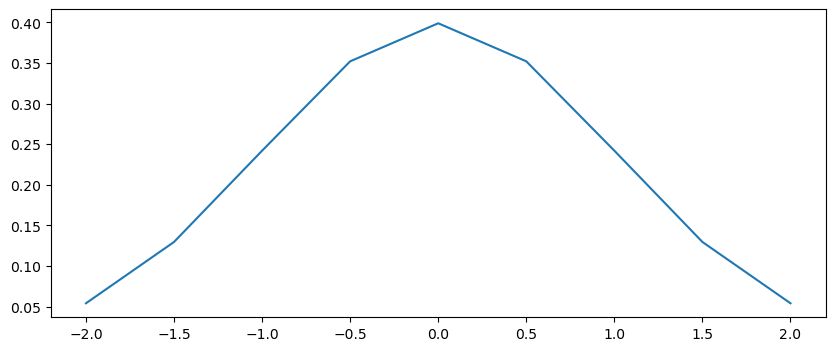

In [14]:
plt.figure(figsize=(10, 4))

norm_0_1 = scipy.stats.norm(0, 1)
x_axis = np.arange(-2, 2.5, 0.5)
y_axis = norm_0_1.pdf(x_axis)

_ = plt.plot(x_axis, y_axis)

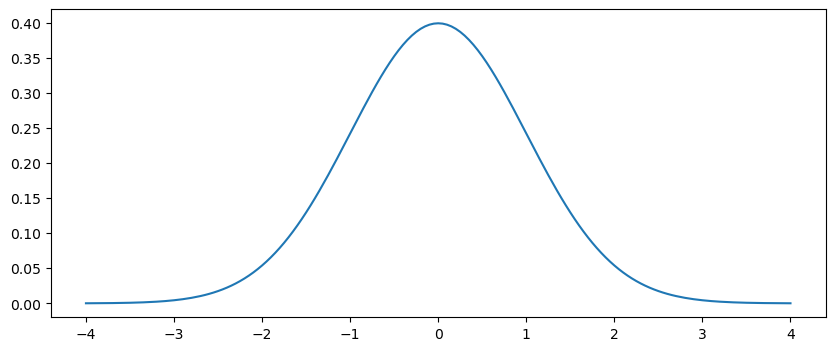

In [15]:
plt.figure(figsize=(10, 4))

norm_0_1 = scipy.stats.norm(0, 1)
x_axis = np.arange(-4, 4.05, 0.05)
y_axis = norm_0_1.pdf(x_axis)

_ = plt.plot(x_axis, y_axis)

### Illustrating Density

* To illustrate the idea that dense regions contribute more random samples, we sample 1,000 values from a normal distribution $\mathcal{N}(\mu=0, \sigma=2)$

* We will plot the values as a histogram
  * We bin the values into 20 bins and plot them as a histogram
  * Counts for each bin are shown on the $y$-axis

In [16]:
# Ex. sampling 10 values from Gaussian with mean 0 and standard deviation 2

np.random.seed(225)
gaussianSamples = np.random.normal(0, 2, 10)
gaussianSamples

array([ 0.62002045, -3.6654824 , -1.21798399, -2.60499913,  1.77670804,
        0.41631649, -2.81801219,  3.74434068,  0.68670599, -0.72788997])

In [17]:
np.random.seed(225)
gaussianSamples = np.random.normal(0, 2, 1000)
gaussianSamples[0:10]

array([ 0.62002045, -3.6654824 , -1.21798399, -2.60499913,  1.77670804,
        0.41631649, -2.81801219,  3.74434068,  0.68670599, -0.72788997])

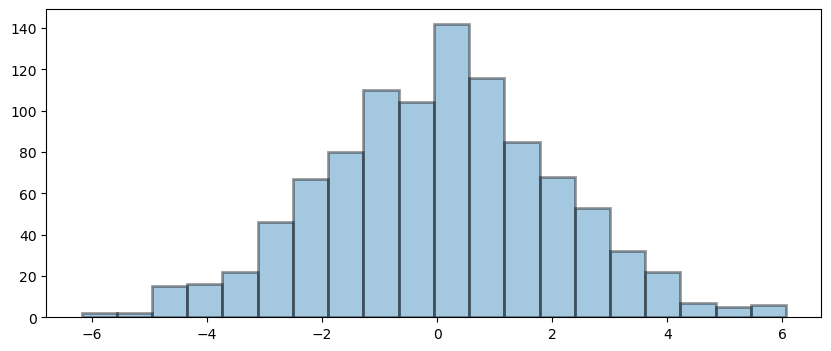

In [18]:
# plot the counts rathe than the density

plt.figure(figsize=(10, 4))
_ = plt.hist(gaussianSamples, bins=20, edgecolor="k", linewidth=2, alpha=0.4)

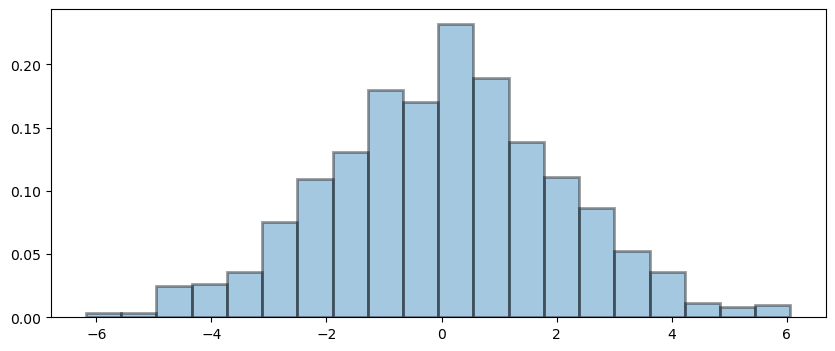

In [19]:
# plots the density rather than the counts

plt.figure(figsize=(10, 4))
_ = plt.hist(gaussianSamples, bins=20, edgecolor="k", linewidth=2, alpha=0.4, density=True)

### Comparing the Density Curve and the Histogram

- We plot the pdf over the histogram to see if it matches the sequence data
- Should the histogram match the density curve exactly?

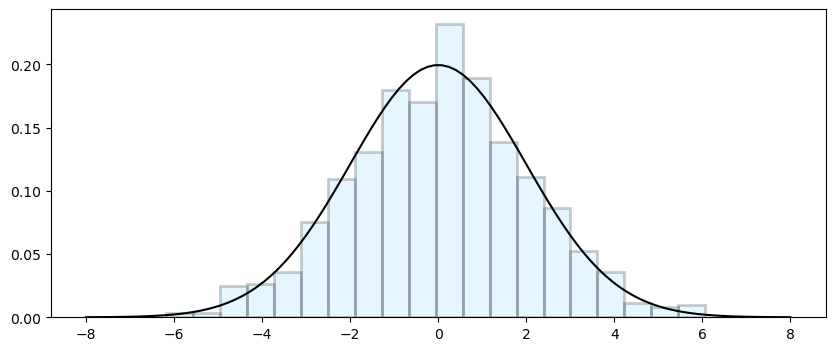

In [20]:
plt.figure(figsize=(10, 4))

normal_0_2 = scipy.stats.norm(0, 2)
x_axis = np.linspace(-8, 8, 100)
y_axis = normal_0_2.pdf(x_axis)

plt.plot(x_axis, y_axis, color="k")

# Note that the param density=True is necessary here
_ = plt.hist(gaussianSamples, bins=20, edgecolor="k", color='#80d4ff', linewidth=2, alpha=0.2, density=True)

In [21]:
from scipy.stats import norm

# we don't need to create the `frozen` distribution beforehand
norm.pdf(0, loc=0, scale=2)    # equivalent to norm.pdf(0, 0, 2)

0.19947114020071635

In [22]:
some_vals = [-2, -1, -0.5, -0.2, -0,1, 0, 0.1, 0.2, 0.5, 1, 2]

mu = 0
sigma = 2

print(f"For mu={mu} and sigma={sigma}:")

for val in some_vals:
    print(f"\tThe probability density of x = {val: >4} is {norm.pdf(val, 0, 2): .7f}")

For mu=0 and sigma=2:
	The probability density of x =   -2 is  0.1209854
	The probability density of x =   -1 is  0.1760327
	The probability density of x = -0.5 is  0.1933341
	The probability density of x = -0.2 is  0.1984763
	The probability density of x =    0 is  0.1994711
	The probability density of x =    1 is  0.1760327
	The probability density of x =    0 is  0.1994711
	The probability density of x =  0.1 is  0.1992220
	The probability density of x =  0.2 is  0.1984763
	The probability density of x =  0.5 is  0.1933341
	The probability density of x =    1 is  0.1760327
	The probability density of x =    2 is  0.1209854


In [23]:
print("The sum of the probability densities computed above is: ", end="")
print(sum([norm.pdf(x, 0, 2) for x in some_vals]))

The sum of the probability densities computed above is: 2.1518536163942685


### The Sum of `pdf`s

- Why is the sum here greater than 1? Aren't the probabilities of the elements in the sample space supposed to sum to 1?

- Remember that the probability at a single point is 0
  * The sample space is infinite
  
- Therefore, `pdf` computes the probability of small interval (Ex. $x-0.01 < x <  x+0.01$)


* We know that:
$$
  density = \frac{mass}{area}
$$

  So, we can convert back to mass such that
$$
  mass = density * area
$$

In [24]:
norm_cdf_sum = 0

for x in np.arange(-8, 8, 0.0001):
    norm_cdf_sum += computePDF_normal(x, 0, 2) * 0.0001
    
print("The sum of the probability densities computed above is: %s" % norm_cdf_sum)

The sum of the probability densities computed above is: 0.9999366575184352
